In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import seaborn as sns

# Classificação das EPDs

Uma equação envolvendo as derivadas parciais de uma função desconhecida de duas ou
mais variáveis independentes é chamada equação diferencial parcial ou EDP. Por exemplo,

\begin{align}
\frac{\partial^2 u}{\partial x^2} + 2 xy \frac{\partial^2 u}{\partial y^2} + u &=1\\
\frac{\partial^3 u}{\partial x^2 \partial y} + x \frac{\partial^2 u}{\partial y^2} + 8 u &= 5y\\
(\frac{\partial^2 u}{\partial x^2})^3 + 6 \frac{\partial^3 u}{\partial x \partial y^2} &= x \\
\frac{\partial^2 u}{\partial x^2} + x u \frac{\partial u}{\partial y} &=x
\end{align}

A ordem de uma EDP é aquela da derivada parcial de maior ordem que aparece na
equação. Por exemplo, as Equações (3) e (4) são de segunda e terceira ordens,
respectivamente.

Por causa de sua ampla gama de aplicações na engenharia, nosso tratamento das
EDPs se concentrará nas equações diferenciais de segunda ordem. Para duas variáveis in-
dependentes, tais equações podem ser expressas na seguinte forma geral:

$$
A \frac{\partial^2 u}{\partial x^2} + B \frac{\partial^2 u}{\partial x \partial y} + C \frac{\partial^2 u}{\partial y^2} + D = 0
$$

onde $A$, $B$ e $C$ são funções de $x$ e $y$ e $D$ é uma função de $x$, $y$, $u$, $\partial u/\partial x$ , e $\partial u/ \partial y$. Dependendo dos valores dos coeficientes dos termos de segunda ordem — $A$, $B$ , $C$ —, a equação acima pode ser classificada em uma de três categorias. 

<p align="center">
<img src="./images/11-clas.png" width=600 height=400 />
</p>

Essa classificação, que é baseada no método das características (veja, por exemplo, Vichnevetsky, 1981, ou Lapidus e Pinder, 1981), é útil porque cada categoria está relacionada com contexto de problemas de engenharia específicos e distintos que exigem técnicas de solução especiais. Deve ser observado que, para os casos nos quais $A$, $B$ e $C$ dependam de $x$ e $y$, na realidade, a equação pode cair em categorias diferentes, dependendo da posição do domínio para o qual a equação é válida. Por simplicidade, limitaremos a discussão seguinte às EDPs que permanecem exclusivamente em uma das categorias.

As *equações elípticas* são tipicamente usadas para caracterizar sistemas estacionários. Como na equação de Laplace na tabela, isso é indicado pela ausência de uma derivada no tempo. Assim, essas equações são usadas tipicamente para determinar distribuições estacionárias de uma incógnita em duas dimensões espaciais.

Em contraste à categoria elíptica, as *equações parabólicas* determinam como uma
incógnita varia tanto no espaço quanto no tempo. Isso se manifesta pela presença tanto de
derivadas espaciais quanto temporais na equação de condução de calor na tabela.
Tais casos são conhecidos como problemas de propagação porque a solução se "propaga"
ou varia no tempo.

A classe final de EDPs, a categoria *hiperbólica*, também trata de problemas de
propagação. Entretanto, uma diferença importante manifestada pela equação de onda na
tabela é que a incógnita é caracterizada pela segunda derivada com relação ao tempo. Como conseqüência, a solução oscila.

# Diferenças Finitas: Equações Elípticas

As equações elípticas na engenharia são usadas tipicamente para caracterizar problemas
de contorno estacionários. Antes de mostrar como eles podem ser resolvidos, ilustraremos como um caso simples — a equação de Laplace — é deduzido de um contexto de problema físico.

## A Equação de Laplace

A Figura abaixo mostra um elemento na face de uma placa retangular fina de espessura
$\Delta z$. A placa é isolada em toda parte, exceto nas bordas, onde a temperatura pode ser fixada em um nível prescrito. O isolamento e o fato de a placa ser fina significam que a transferência de calor é limitada às direções $x$ e $y$. No estado estacionário, o fluxo de calor para dentro do elemento em um período unitário $\Delta t$ deve ser igual ao fluxo para fora, como em

$$
q(x) \Delta y \Delta z \Delta t + q(y) \Delta x \Delta z \Delta t = q(x + \Delta x) \Delta y \Delta z \Delta t + q(y + \Delta y) \Delta x \Delta z \Delta t
$$

<p align="center">
<img src="./images/11-laplace1.png" width=400 height=400 />
</p>

onde $q(x)$ e $q(y)$ são os fluxos de calor nas direções $x$ e $y$, respectivamente $[cal/(cm^2 · s)]$. Dividindo por $\Delta z$ e $\Delta t$ e agrupando os termos, obtemos

$$
[q(x) - q(x + \Delta x)]\Delta y + [q(y) - q(y + \Delta y)]\Delta x = 0
$$

Multiplicando o primeiro termo por $\Delta x/ \Delta x$ e o segundo por $\Delta y/ \Delta y$, obtemos

$$
\frac{q(x) - q(x+\Delta x)}{\Delta x} \Delta x \Delta y + \frac{q(y) - q(y+\Delta y)}{\Delta y} \Delta y \Delta x = 0
$$

Dividindo por $\Delta x \Delta y$ e tomando o limite, resulta em

$$
- \frac{\partial q}{\partial x} - \frac{\partial q}{\partial y} = 0.
$$

Essa equação é uma equação diferencial parcial que é uma expressão da conservação da energia na placa. Entretanto, a menos que os fluxos de calor sejam especificados nas bordas da placa, ela não pode ser resolvida. Como as condições de contorno para a temperatura são dadas, a Equação acima deve ser reformulada em termos da temperatura. A ligação entre o fluxo e a temperatura é fornecida pela *lei de condução de calor de Fourier*, que pode ser representada por:

$$
q_i = -k\rho C \frac{\partial T}{\partial i}
$$

onde $q_i$ é o fluxo de calor na direção da dimensão $i \;\; [cal/(cm^2 · s)], \; k$ é o *coeficiente de difusividade térmica* $(cm^2/s)$, $\rho$ é a densidade do material $(g/cm^3), C$ é a capacidade calorífica do material $[cal/(g · ^\circ C)]$ e $T$ é a temperatura, que é definida por

$$
T = \frac{H}{\rho C V}
$$

onde $H$ é o calor (cal) e $V$ é o volume ($cm^3$). Às vezes, é definido um único termo,

$$
k' = k \rho C
$$

onde $k'$ é conhecido como *coeficiente de condutividade térmica* $[cal/(s · cm · ^\circ C)]$. Em ambos os casos, $k$ e $k'$ são parâmetros que refletem quão bem o material conduz o calor.

A lei de Fourier é chamada algumas vezes *equação constitutiva*. Ela recebe essa designação porque fornece um mecanismo que define as interações internas do sistema. A inspeção da da equação da lei de Fourier indica que ela especifica que o fluxo de calor perpendicular ao eixo $i$ é proporcional ao gradiente ou inclinação da temperatura na direção $i$. O sinal negativo garante que um fluxo positivo na direção $i$ resulta de uma inclinação negativa de alta para baixa temperatura. A substituição da equação da Fouorier na equação de conservação resulta em

$$
\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2}  = 0
$$

que é a **equação de Laplace**. Observe que para o caso no qual existem fontes ou sumidouros de calor no domínio bidimensional, a equação pode ser representada por

$$
\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2}  = f(x,y)
$$

onde $f (x, y)$ é a função descrevendo as fontes ou sumidouros de calor. A equação acima é
conhecida como *equação de Poisson*.

## Técnicas de Soluções

Para a solução numérica, representações por *diferenças finitas*, baseadas no tratamento da placa como uma grade de pontos discretos, substituem as derivadas parciais na equação de Laplace. Como descrito a seguir, a EDP é transformada em uma equação de diferença algébrica.

<p align="center">
<img src="./images/11-diff.png" width=400 height=400 />
</p>

### A Equação de Diferença de Laplace

As diferenças centradas baseadas no esquema de grade são

\begin{align*}
\frac{\partial^2 T}{\partial x^2} &= \frac{T_{i+1, j} - 2 T_{i,j}+ T_{i-1,j}}{\Delta x^2}\\
\frac{\partial^2 T}{\partial y^2} &= \frac{T_{i, j+1} - 2 T_{i,j}+ T_{i,j-1}}{\Delta y^2}
\end{align*}

que têm erros de $O[\Delta(x)^2]$ e $O[\Delta(y)^2]$, respectivamente. Substituindo essas expressões na equação de Laplace, obtemos

$$
\frac{T_{i+1, j} - 2 T_{i,j}+ T_{i-1,j}}{\Delta x^2} + \frac{T_{i, j+1} - 2 T_{i,j}+ T_{i,j-1}}{\Delta y^2} = 0
$$

Para a grade quadrada, igual a figura, $\Delta x = \Delta y$, e, agrupando os termos, a equação se torna

$$
T_{i+1, j} + T_{i-1,j} + T_{i, j+1} + T_{i,j-1} - 4 T_{i,j} = 0
$$

Essa relação, que é válida para todos os pontos interiores da placa, é conhecida como
*equação de diferença de Laplace*.

Além disso, devem ser especificadas condições de contorno ao longo das bordas da
placa para se obter uma **única solução**. O caso mais simples é quando a temperatura nas
bordas é mantida em valores fixos. Isso é chamado condição de contorno de Dirichlet.
Esse é o caso na figura abaixo, na qual as bordas são mantidas a temperaturas constantes. **Nessa figura a indexação das linhas e colunas é diferente do padrão do Python e C e é baseado no Fortran. Para ter a indexação do Python trocam a ordem (i, j) para (j, i) e o elemento do canto superior esquerdo é (1,1)**

<p align="center">
<img src="./images/11-const.png" width=400 height=400 />
</p>


Para o caso ilustrado na figura, um balanço para o nó $(1, 1)$ é, de acordo com a
equação de diferença de Laplace,

$$
T_{21} + T_{01} + T_{12} + T_{10} - 4 T_{11} = 0
$$

Entretanto, $T_{01} = 75$ e $T_{10} = 0$, e, portanto, a equação acima pode ser expressa como

$$
-4 T_{11} + T_{12} + T_{21} = 75
$$

Equações análogas podem ser deduzidas para os outros pontos interiores.

[[100 100 100 100 100 100 100 100 100 50]
 [75 T_{11} T_{12} T_{13} T_{14} T_{15} T_{16} T_{17} T_{18} 50]
 [75 T_{21} T_{22} T_{23} T_{24} T_{25} T_{26} T_{27} T_{28} 50]
 [75 T_{31} T_{32} T_{33} T_{34} T_{35} T_{36} T_{37} T_{38} 50]
 [75 T_{41} T_{42} T_{43} T_{44} T_{45} T_{46} T_{47} T_{48} 50]
 [75 T_{51} T_{52} T_{53} T_{54} T_{55} T_{56} T_{57} T_{58} 50]
 [75 T_{61} T_{62} T_{63} T_{64} T_{65} T_{66} T_{67} T_{68} 50]
 [75 T_{71} T_{72} T_{73} T_{74} T_{75} T_{76} T_{77} T_{78} 50]
 [75 T_{81} T_{82} T_{83} T_{84} T_{85} T_{86} T_{87} T_{88} 50]
 [0 0 0 0 0 0 0 0 0 50]]


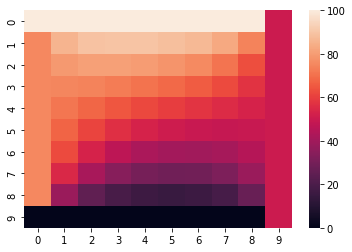

In [52]:
n = 10
variables = [sp.symbols('T_{'+str(i)+str(j)+'}') for i in range(n) for j in range(n)]
T = np.array([variables[i*n:i*n + n] for i in range(n)])

T[:, 0] = 75
T[0, :] = 100
T[n-1, :] = 0
T[:, n-1] = 50

print(T)

eqs = []
for i in range(1, n-1):
    for j in range(1, n-1):
        eq = T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1] - 4*T[i, j]
        eqs.append(eq)

        
variables_final =  [item for item in T.flatten() if isinstance(item, sp.core.symbol.Symbol)]
res = sp.solve(eqs, variables_final)
temps =np.array( [float(v) for v in res.values()])
##temps = np.array( [float(v) for v in list(res)[0]])
temps = temps.reshape(-1, n-2)
T[1:-1, 1:-1] = temps 
T = T.astype(float)


sns.heatmap( T )
plt.show()

**Exercicio:** Implemente esse algoritmo usando Numpy

### O Método de Liebmann

A maioria das soluções numéricas da equação de Laplace envolve sistemas que são muito
maiores do que o do exemplo acima. Por exemplo, uma grade 10 por 10 envolve 100
equações algébricas lineares.

Observe que existe um máximo de cinco termos desconhecidos por linha na Equação de diferença de Laplace do exemplo acima. Para grades de tamanho maior, isso quer dizer que um número significativo de termos será zero. Quando aplicados a tais sistemas esparsos, métodos de eliminação para a matriz toda desperdiçam uma grande quantidade de memória computacional armazenando esses zeros. Por essa razão, os métodos aproximados fornecem uma abordagem viável para obter soluções de equações elípticas. A abordagem mais comumente usada é a do método de *Gauss-Seidel*, que, quando aplicado a EDPs, também é conhecido como *método de Liebmann*. Nessa técnica, a Equação de diferença de Laplace é expressa por

$$
T_{i,j} = \frac{T_{i+1, j} + T_{i-1,j} + T_{i, j+1} + T_{i, j-1}}{4}
$$

e resolvida iterativamente de $j = 1$ a $n$ e de $i = 1 $a $m$. Como a equação de diferença de Laplace é diagonal dominante, esse procedimento eventualmente convergirá para uma solução estável. A sobre-relaxação algumas vezes é usada para acelerar a taxa de convergência por meio da aplicação da seguinte fórmula, depois de cada iteração:

$$
T_{i,j}^{\text{novo}} = \lambda T_{i,j}^{\text{novo}} + (1- \lambda) T_{i,j}^{\text{velho}}
$$

onde $T_{i,j}^{\text{novo}}$ e $T_{i,j}^{\text{velho}}$ são os valores de $T_{i,j}$ da iteração atual e da anterior, respectivamente e $\lambda$ é um fator de peso que é fixado entre 1 e 2.

Como no método de Gauss-Seidel convencional, as iterações são repetidas até que
os valores absolutos de todos os erros relativos porcentuais $(\epsilon_a)_{i, j}$ caiam abaixo de um critério de parada pré-especificado  $(\epsilon_s)$ . São obtidas estimativas para esses erros relativos porcentuais por

$$
|(\epsilon_a)_{i, j}| = |\frac{T_{i,j}^{\text{novo}} - T_{i,j}^{\text{velho}}}{T_{i,j}^{\text{novo}}}|
$$

##### Exemplo: 

Use o método de Liebmann (Gauss-Seidel) para determinar a temperatura da placa aquecida na Figura acima. Use sobre-relaxação com um valor de $1.5$ para o fator de peso e itere até $\epsilon_s = 1\%$.

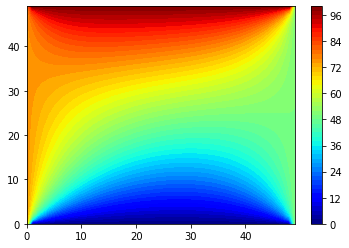

In [58]:
#from numpy import meshgrid , arange , full , linalg

#Build a mesh
X , Y = np.meshgrid(np.arange (0 , 50) , np.arange (0 , 50) )

#Initialize
U0 = 30 # first guess
U= np.full ((50 , 50) , U0 , dtype = float )
V= np.full ((50 , 50) , U0 , dtype = float )
# Boundary contitions
Unorth = 100
Usouth = 0
Uwest = 75
Ueast = 50

U [49 ,:] = Unorth #Dirichlet
U [0 ,:] = Usouth #Dirichlet
U [: , 0] = Uwest #Dirichlet
U [: , 49:] = Ueast #Dirichlet
#U [: , 48:] = Ueast #Neumann


#Iteration settings
iteration =0
dxy = 1
imax = 10000

#Iterate
while iteration < imax :
    #
    # Calculate central point
    for i in range(1 , 49 , dxy ) :
        for j in range (1 , 49 , dxy ) :
            U [i , j ] = ( U [i -1 , j ]
            + U [ i +1 , j ]
            + U [i ,j -1]
            + U [i , j +1]) /4
    iteration +=1
    error = ( np.linalg.norm(U) - np.linalg.norm(V)) \
    / np.linalg.norm ( U )


    # V = U.copy()
    for i in range (0 ,50) :
        for j in range (0 ,50): 
            V[i][j]= U[i][j]

    if error < 0.0001: 
        iteration = imax


plt.contourf(X ,Y ,U , 60, cmap = plt.cm.jet )
#sns.heatmap(U)
plt.colorbar()
plt.show()

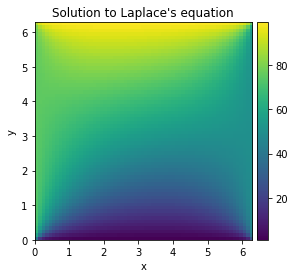

In [4]:
from pde import CartesianGrid, solve_laplace_equation

grid = CartesianGrid([[0, 2 * np.pi]] * 2, 64)
#bcs = [{"value": "sin(y)"}, {"value": "sin(x)"}]
bc_x = [{'value': 75}, {"value":50}]
bc_y = [{"value":0}, {'value': 100} ]
bcs = [bc_x, bc_y]

res = solve_laplace_equation(grid, bcs)
res.plot()

### Variáveis Secundárias

Como sua distribuição é descrita pela equação de Laplace, a temperatura é considerada a
variável primária no problema da placa aquecida. Nesse caso, bem como para outros
problemas envolvendo EDPs, variáveis secundárias também podem ter interesse. Na realidade, em certos contextos de engenharia, as variáveis secundárias podem de fato ser mais importantes.

Para a placa aquecida, uma variável secundária é a taxa de fluxo de calor através
da superfície da placa. Essa quantidade pode ser calculada a partir da lei de Fourier.
Aproximações por diferenças finitas centrais para as primeiras derivadas podem ser substituídas na equação da condução de Fourier para fornecer os seguintes valores para o fluxo de calor nas dimensões $x$ e $y$:

\begin{align*}
q_x  &= -k' \frac{T_{i+1, j} - T_{i-1, j}}{2 \Delta x}\\
q_y &= -k' \frac{T_{i, j+1} - T_{i, j-1}}{2 \Delta y}
\end{align*}

O fluxo de calor resultante pode ser calculado a partir dessas duas quantidades por

$$
q_n = \sqrt{q_x^2 + q_y^2}
$$

onde a direção de qn é dada por

$$
\theta = \tan^{-1}(\frac{q_y}{q_x})
$$

para $q_x > 0 $ e 

$$
\theta = \tan^{-1}(\frac{q_y}{q_x}) + \pi
$$

para $q_x < 0$. Lembre-se de que o ângulo pode ser expresso em graus multiplicando-o por
$180^\circ/\pi$. Se $q_x = 0, \theta$ é $\pi/2 (90^\circ)$ ou $3\pi/2 (270^\circ)$, dependendo de $q_y$ ser positivo ou negativo, respectivamente.

#### Exemplo: Distribuição do Fluxo para uma Placa Aquecida

Use os resultados do Exemplo anterior para determinar a distribuição de fluxo de calor na placa aquecida . Suponha que a placa tenha $40 \times 40 cm$ e seja feita de alumínio $[k'  = 0.49 cal/(s · cm · ^\circ C)]$.

**Resposta:**

Para $i = j = 1$

\begin{align*}
q_x & = -0.49 \frac{33.29 - 75}{2 (10)} = 1.022 \;\; cal/(cm^2 · s)\\
q_y & = -0.49 \frac{63.21 - 0}{2 (10)} = -1.549 \;\; cal/(cm^2 · s)
\end{align*}

O fluxo resultante pode ser calculado

$$
q_n = \sqrt{(1.022)^2 + (-1.549)^2} = 1.856 \;\;cal/(cm^2 · s)
$$

e o ângulo de sua trajetória

$$
\theta = \tan^{-1}(\frac{-1.549}{1.022}) = -0.9875 \times \frac{180^\circ}{\pi} = -56.58^\circ
$$

Assim, nesse ponto, o fluxo de calor aponta para baixo e para a direita. Os valores nos ou-
tros pontos da grade podem ser calculados;

<p align="center">
<img src="./images/11-flux.png" width=400 height=400 />
</p>

**Exercicio: Reproduz a imagem usando o Python**

### Condições de Contorno

Como os fatores complicadores estão ausentes, a placa retangular com condições de contorno fixas foi um contexto ideal para mostrar como as EDPs elípticas podem ser resolvidas numericamente. Agora, consideraremos outras questões que vão expandir nossos recursos para tratar problemas mais realísticos. Estes envolvem bordas nas quais as derivadas são especificadas e bordas que têm forma irregular.

#### Condições de Contorno na Derivada

A condição de *contorno de Dirichlet* ou *fixa*, discutida até este ponto, é apenas uma dentre os diversos tipos que são utilizados em equações diferenciais parciais. Uma alternativa comum é o caso em que a derivada é dada. Isso em geral é conhecido como condição de *contorno de Neumann*. Para o problema da placa aquecida, isso quer dizer especificar o fluxo de calor em vez da temperatura na borda. Um exemplo é a situação na qual a borda é isolada. Nesse caso, o qual é conhecido como uma condição de contorno natural, a derivada é nula. Essa conclusão é tirada diretamente da equação de condução de Fourier, pois isolar a fronteira significa que o fluxo de calor (e, conseqüentemente, o gradiente) deve ser nulo. Outro exemplo seria quando se perde calor pela aresta por mecanismos previsíveis tais como radiação e condução.

A figura abaixo descreve um nó $(0, j)$ na aresta esquerda da placa aquecida. 

<p align="center">
<img src="./images/11-neu1.png" width=300 height=300 />
</p>

Aplicando-se a equação da diferença de Laplace a esse ponto, obtemos

$$
T_{1, j} + T_{−1, j} + T_{0, j+1} + T_{0, j−1} − 4 T_{0, j} = 0
$$

Observe que um ponto imaginário $(−1, j)$, localizado fora da placa, é necessário nessa
equação. Embora esse ponto exterior fictício possa parecer representar um problema, na
realidade, serve como veículo para incorporar a condição de contorno na derivada ao
problema. Isso é feito representando-se a primeira derivada na dimensão $x$ em $(0, j)$ por
uma diferença dividida finita

$$
\frac{\partial T}{\partial x} \approx \frac{T_{1,j} - T_{-1, j}}{2 \Delta x}
$$

que pode ser reescrita como

$$
T_{-1, j} = T_{1,j} - 2 \Delta x \frac{\partial T}{\partial x}
$$

Agora, temos uma relação para $T_{−1, j}$ que realmente inclui a derivada. Ela pode ser substituída na equação principla para fornecer

$$
2T_{1, j} − 2 \Delta x  \frac{\partial T}{\partial x}+ T_{0, j+1} + T_{0, j−1} − 4T_{0, j} = 0
$$

Assim, incorporamos a derivada no balanço.

Relações análogas podem ser desenvolvidas para condições de contorno na derivada
nas outras arestas. O seguinte exemplo mostra como isso é feito para a placa aquecida.